In [80]:
import seaborn as sns
import pandas as pd

infileNetwork = "../img/2023_smartFactory_networkTransmission.pkl"
outfileNetwork = "../img/2023_smartFactory_networkTransmission.pdf"

infileTrigger = "../img/2023_smartFactory_triggerDelay.pkl"
outfileTrigger = "../img/2023_smartFactory_triggerDelay.pdf"

print("Setup done.")

Setup done.


In [81]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 5)
print(colors)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

[(0.9125259515570934, 0.9125259515570934, 0.9125259515570934), (0.7777777777777778, 0.7777777777777778, 0.7777777777777778), (0.586082276047674, 0.586082276047674, 0.586082276047674), (0.40784313725490196, 0.40784313725490196, 0.40784313725490196), (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)]
sns initialized.


In [82]:
df_calls = pd.read_pickle(infileNetwork)
df_calls.head()

,pair,latency,call
0,azure - aws,1740.192441,panelProduction - publisher
1,azure - aws,53.478315,panelProduction - publisher
2,google - aws,27.455964,cushionProduction - publisher
3,google - aws,32.612852,cushionProduction - publisher
4,azure - aws,106.793064,panelProduction - publisher


In [83]:
rename = [
    ["aws - aws","AWS - AWS"],
    ["azure - aws","Azure - AWS"],
    ["google - aws","GCP - AWS"],
    ["azure - azure","Azure - Azure"],
    ["aws - azure","AWS - Azure"],
    ["google - google","GCP - GCP"],
    ["aws - google","AWS - GCP"],
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:aws - aws, new:AWS - AWS
old:azure - aws, new:Azure - AWS
old:google - aws, new:GCP - AWS
old:azure - azure, new:Azure - Azure
old:aws - azure, new:AWS - Azure
old:google - google, new:GCP - GCP
old:aws - google, new:AWS - GCP


,pair,latency,call
0,Azure - AWS,1740.192441,panelProduction - publisher
1,Azure - AWS,53.478315,panelProduction - publisher
2,GCP - AWS,27.455964,cushionProduction - publisher
3,GCP - AWS,32.612852,cushionProduction - publisher
4,Azure - AWS,106.793064,panelProduction - publisher


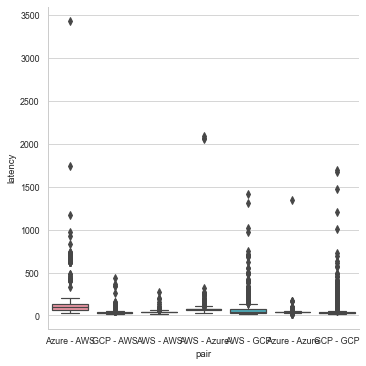

In [84]:
plot = sns.catplot(x = "pair", y = "latency", kind="box", data=df_calls, orient="v")

In [85]:
#Build order
classes = ["AWS - AWS", "Azure - AWS", "GCP - AWS",
           "Azure - Azure", "AWS - Azure", "GCP - GCP", "AWS - GCP"]

C:\Users\Martin\.conda\envs\BeFaaS-analysis\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


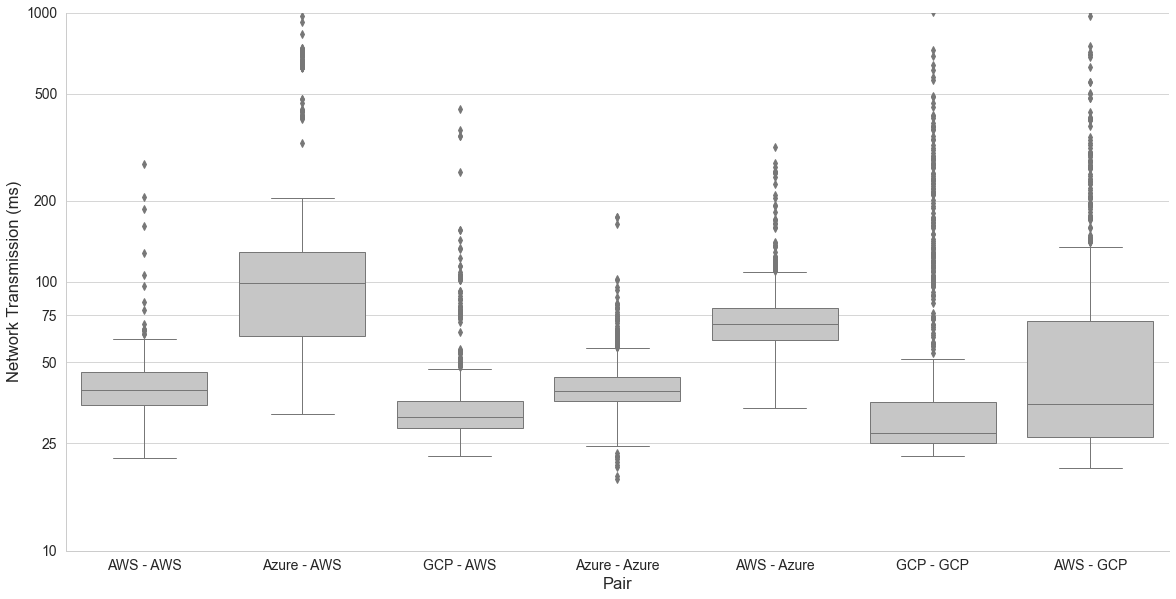

In [86]:

plot = sns.catplot(x = "pair", y = "latency", kind="box", data=df_calls,
                   height=8, aspect=2, legend=False, linewidth=1,
                   order=classes, orient="v", color= colors[1])

plot.set_xlabels(label = "Pair", fontsize="xx-large")
plot.set_ylabels(label = "Network Transmission (ms)", fontsize="xx-large")
plot.set_yticklabels(size = 14)
plot.set_xticklabels(size = 14)
plot.ax.set(yscale="log")
plot.ax.set_yticks([10, 25, 50, 75, 100, 200, 500, 1000])
plot.set_yticklabels([10, 25, 50, 75, 100, 200, 500, 1000], size = 14)
plot.set(ylim=(0, 1000))
#plot.ax.legend(loc=0, fontsize="x-large")
plot.savefig(outfileNetwork)



old:aws, new:AWS
old:azure, new:Azure
old:google, new:GCP
old:publisher, new:Publisher Duration
old:trigger, new:Trigger Delay


C:\Users\Martin\.conda\envs\BeFaaS-analysis\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


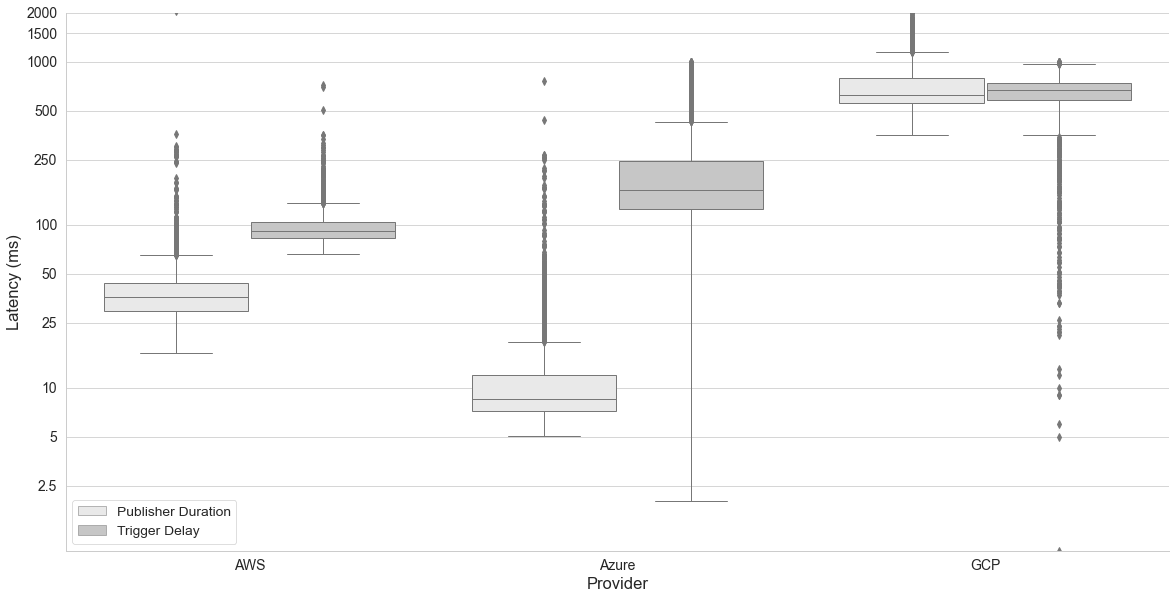

In [87]:
classes = ["AWS", "Azure", "GCP"]
myorder = ["Publisher Duration", "Trigger Delay"]

df_calls = pd.read_pickle(infileTrigger)

rename = [
    ["aws","AWS"],
    ["azure","Azure"],
    ["google","GCP"],
    ["publisher","Publisher Duration"],
    ["trigger","Trigger Delay"],
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()
plot = sns.catplot(x = "pair", y = "latency", hue="kind", kind="box", data=df_calls,
                   height=8, aspect=2, legend=False, linewidth=1,
                   hue_order=myorder, order=classes, orient="v")

plot.set_xlabels(label = "Provider", fontsize="xx-large")
plot.set_ylabels(label = "Latency (ms)", fontsize="xx-large")
plot.set_yticklabels(size = 14)
plot.set_xticklabels(size = 14)
plot.ax.set(yscale="log")
plot.ax.set_yticks([0, 2.5, 5, 10, 25, 50, 100, 250, 500, 1000, 1500, 2000])
plot.set_yticklabels([0, 2.5, 5, 10, 25, 50, 100, 250, 500, 1000, 1500, 2000], size = 14)
plot.set(ylim=(0, 2000))
plot.ax.legend(loc=0, fontsize="x-large")
plot.savefig(outfileTrigger)